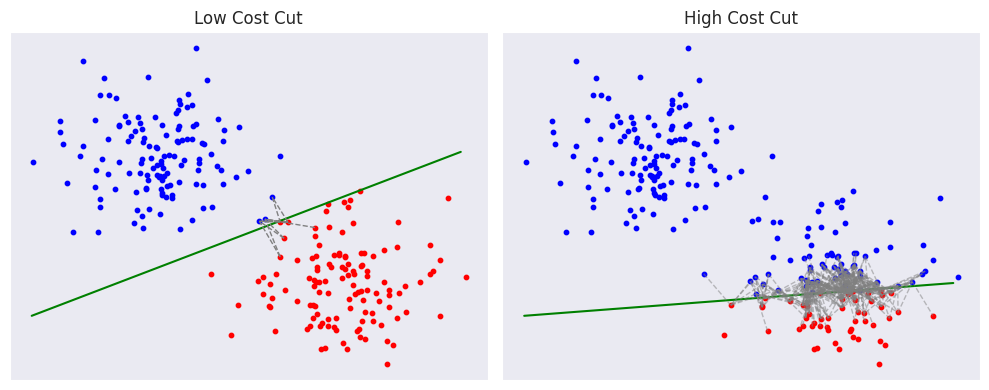

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns

sns.set_style('darkgrid')

data, labels = make_blobs(n_samples=250, centers=[(0.3, 0.7), (0.7, 0.3)], cluster_std=0.12)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
def line_function(x):
    return 0.5 * x + 0.2

above_line = data[:, 1] > line_function(data[:, 0])
below_line = ~above_line

plt.scatter(data[above_line, 0], data[above_line, 1], color='blue', label='Above line', s=10)
plt.scatter(data[below_line, 0], data[below_line, 1], color='red', label='Below line', s=10)

x_vals = np.linspace(0, 1, 100)
y_vals = line_function(x_vals)
plt.plot(x_vals, y_vals, color='green', label='Line function')

for i in range(len(data)):
    for j in range(i + 1, len(data)):
        if above_line[i] != above_line[j]:
            dist = np.linalg.norm(data[i] - data[j])
            if dist < 0.12:
                plt.plot([data[i, 0], data[j, 0]], [data[i, 1], data[j, 1]], color='gray', linestyle='--', linewidth=1)

plt.xticks([])
plt.yticks([])

plt.title('Low Cost Cut')

plt.subplot(1, 2, 2)

def line_function(x):
    return 0.1 * x + 0.2

above_line = data[:, 1] > line_function(data[:, 0])
below_line = ~above_line

plt.scatter(data[above_line, 0], data[above_line, 1], color='blue', label='Above line', s=10)
plt.scatter(data[below_line, 0], data[below_line, 1], color='red', label='Below line', s=10)

x_vals = np.linspace(0, 1, 100)
y_vals = line_function(x_vals)
plt.plot(x_vals, y_vals, color='green', label='Line function')

for i in range(len(data)):
    for j in range(i + 1, len(data)):
        if above_line[i] != above_line[j]:
            dist = np.linalg.norm(data[i] - data[j])
            if dist < 0.12:
                plt.plot([data[i, 0], data[j, 0]], [data[i, 1], data[j, 1]], color='gray', linestyle='--', linewidth=1, alpha=0.5)

plt.xticks([])
plt.yticks([])

plt.title('High Cost Cut')
plt.tight_layout()
plt.savefig("similarity_matrix_visual.png", dpi=300)
# plt.show()

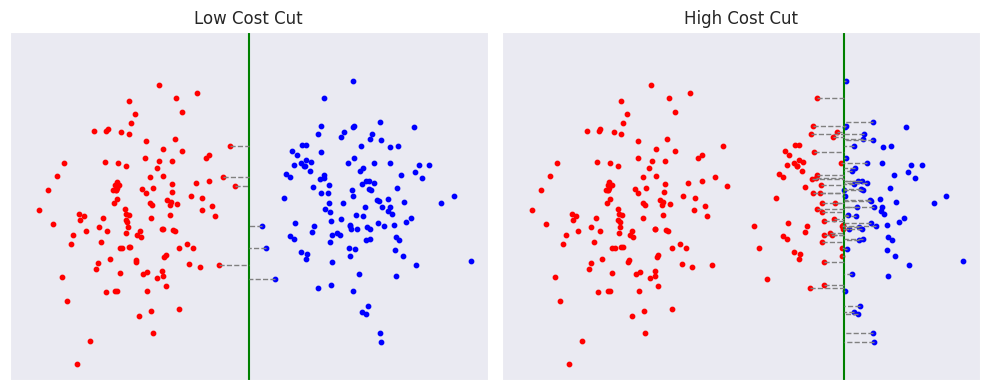

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns

sns.set_style('darkgrid')

data, labels = make_blobs(n_samples=250, centers=[(0.2, 0.5), (0.8, 0.5)], cluster_std=0.12)

plt.figure(figsize=(10, 4))


def perpendicular_distance_and_point(x1, x2, line_x):

    distance = abs(x1 - line_x)

    return distance, (line_x, x2)


plt.subplot(1, 2, 1)

line_x = 0.5

above_line = data[:, 0] > line_x
below_line = ~above_line

plt.scatter(data[above_line, 0], data[above_line, 1], color='blue', label='Above line', s=10)
plt.scatter(data[below_line, 0], data[below_line, 1], color='red', label='Below line', s=10)


plt.axvline(x=line_x, color='green', label='Vertical line at x=0.5')

for i in range(len(data)):
    distance, intersection_point = perpendicular_distance_and_point(data[i, 0], data[i, 1], line_x)
    if distance <= 0.1:

        x1, y1 = data[i]
        x2, y2 = intersection_point
        plt.plot([x1, x2], [y1, y2], color='gray', linestyle='--', linewidth=1)

plt.xticks([])
plt.yticks([])
plt.xlim(-0.2, 1.2)
plt.ylim(0.1, 0.9)

plt.title('Low Cost Cut')

plt.subplot(1, 2, 2)

line_x = 0.8

above_line = data[:, 0] > line_x
below_line = ~above_line

plt.scatter(data[above_line, 0], data[above_line, 1], color='blue', label='Above line', s=10)
plt.scatter(data[below_line, 0], data[below_line, 1], color='red', label='Below line', s=10)


plt.axvline(x=line_x, color='green', label='Vertical line at x=0.7')

for i in range(len(data)):
    distance, intersection_point = perpendicular_distance_and_point(data[i, 0], data[i, 1], line_x)
    if distance <= 0.1:

        x1, y1 = data[i]
        x2, y2 = intersection_point
        plt.plot([x1, x2], [y1, y2], color='gray', linestyle='--', linewidth=1, alpha=1)

plt.xticks([])
plt.yticks([])
plt.xlim(-0.2, 1.2)
plt.ylim(0.1, 0.9)


plt.title('High Cost Cut')

plt.tight_layout()
plt.savefig("border_distances_visual.png", dpi=300, bbox_inches='tight')
